In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
df = pd.DataFrame({'randn':np.random.randn(100),
                   'letters':['a','b','c','d']*24+['a']*4,
                   'range':np.arange(0,1000,10),
                   'uniform':np.random.uniform(0,30,size=100),
                   'some_nulls': [np.nan,2,3,5]*25})


In [34]:
df.dtypes

randn         float64
letters        object
range           int64
uniform       float64
some_nulls    float64
dtype: object

In [35]:
df.head()

,randn,letters,range,uniform,some_nulls
0,0.245385,a,0,5.809778,NaN
1,0.600244,b,10,28.270515,2.0
2,1.118000,c,20,12.322144,3.0
3,-0.706993,d,30,22.930663,5.0
4,0.855469,a,40,21.723021,NaN


In [36]:
df.shape

(100, 5)

In [37]:
df.describe(include=['object'])

,letters
count,100
unique,4
top,a
freq,28


In [38]:
df.columns

Index(['randn', 'letters', 'range', 'uniform', 'some_nulls'], dtype='object')

In [39]:
df.rename(columns = {'range':'range_10'}).head()

,randn,letters,range_10,uniform,some_nulls
0,0.245385,a,0,5.809778,NaN
1,0.600244,b,10,28.270515,2.0
2,1.118000,c,20,12.322144,3.0
3,-0.706993,d,30,22.930663,5.0
4,0.855469,a,40,21.723021,NaN


In [40]:
df.head()

,randn,letters,range,uniform,some_nulls
0,0.245385,a,0,5.809778,NaN
1,0.600244,b,10,28.270515,2.0
2,1.118000,c,20,12.322144,3.0
3,-0.706993,d,30,22.930663,5.0
4,0.855469,a,40,21.723021,NaN


In [41]:
df.dropna(subset = ['some_nulls']).shape

(75, 5)

In [42]:
df.fillna('66',inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
randn         100 non-null float64
letters       100 non-null object
range         100 non-null int64
uniform       100 non-null float64
some_nulls    100 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [45]:
df.dtypes

randn         float64
letters        object
range           int64
uniform       float64
some_nulls     object
dtype: object

In [46]:
df['some_nulls'] = df.some_nulls.astype(float)

In [48]:
df.mean(axis=1)

0      18.013791
1      10.217690
2       9.110036
3      14.305917
4      32.144623
         ...    
95    245.415190
96    257.806748
97    243.560867
98    252.788931
99    251.135022
Length: 100, dtype: float64

In [49]:
df.letters.str.upper().head()

0    A
1    B
2    C
3    D
4    A
Name: letters, dtype: object

In [54]:
df.drop('randn',axis=1).corrwith(df.randn)

range         0.087189
uniform      -0.033505
some_nulls    0.172845
dtype: float64

In [56]:
df.randn

0     0.245385
1     0.600244
2     1.118000
3    -0.706993
4     0.855469
        ...   
95   -0.065640
96    0.660430
97   -0.625527
98    1.431549
99   -0.489090
Name: randn, Length: 100, dtype: float64

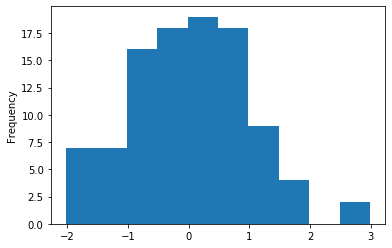

In [57]:
df.randn.plot(kind='hist')

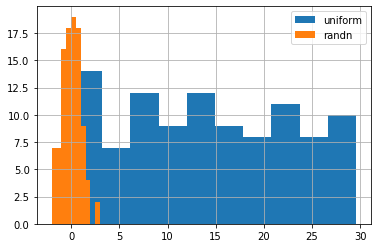

In [60]:
df.uniform.hist(label='uniform')
df.randn.hist(label = 'randn')
plt.legend()


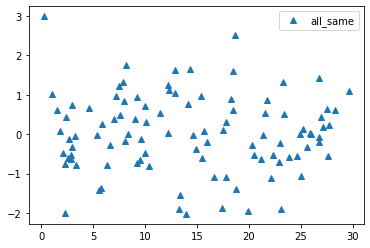

In [61]:
plt.plot(df.uniform,df.randn,linestyle='',marker = '^',label='all_same')
plt.legend()

In [62]:
# In SQL terms
# SELECT
# letters,
# STD(randn),
# AVG(uniform)
# FROM DF
# GROUP BY letters


df.groupby('letters').agg({'randn':'std','uniform':'mean'})

,randn,uniform
letters,,
a,1.003886,12.147796
b,0.901581,13.625596
c,1.191182,14.794909
d,0.728018,17.014849


In [67]:
df.pivot_table(index = 'letters', columns = 'some_nulls',values = 'uniform',aggfunc = {'uniform':'mean'})

some_nulls,2.0,3.0,5.0,66.0
letters,,,,
a,2.868996,26.724173,10.029178,12.020638
b,13.625596,NaN,NaN,NaN
c,NaN,14.794909,NaN,NaN
d,NaN,NaN,17.014849,NaN


In [68]:
df[(df.some_nulls ==2) & (df.letters =='c')]

,randn,letters,range,uniform,some_nulls


In [69]:
left_df = df.loc[[2,4,6],['letters','randn']]
left_df

,letters,randn
2,c,1.118000
4,a,0.855469
6,c,0.175473


In [70]:
right_df = df.loc[1:3,['letters','uniform']] 
right_df

,letters,uniform
1,b,28.270515
2,c,12.322144
3,d,22.930663


In [71]:
left_df.merge(right_df,on='letters',how='inner')

,letters,randn,uniform
0,c,1.118000,12.322144
1,c,0.175473,12.322144


In [72]:
left_df.merge(right_df,on='letters',how='outer')

,letters,randn,uniform
0,c,1.118000,12.322144
1,c,0.175473,12.322144
2,a,0.855469,NaN
3,b,NaN,28.270515
4,d,NaN,22.930663


In [73]:
left_df.merge(right_df,on='letters',how='right')

,letters,randn,uniform
0,c,1.118000,12.322144
1,c,0.175473,12.322144
2,b,NaN,28.270515
3,d,NaN,22.930663


In [74]:
def funky_stuff(row):
    if row['letters'] == 'a':
        return row['randn']*2
    elif row['range'] > 500 and row['uniform'] < 15:
        return row['randn'] ** 2
    else:
        return row['randn']



In [76]:
df['funky'] = df.apply(funky_stuff,axis=1)

In [77]:
df[(df.funky == df.randn*2) & (df.range > 500) & (df.uniform < 15)]

,randn,letters,range,uniform,some_nulls,funky
52,-0.332837,a,520,2.983470,66.0,-0.665674
56,0.749004,a,560,2.927353,66.0,1.498008
60,0.725803,a,600,9.997442,66.0,1.451605
64,-0.723787,a,640,9.222055,66.0,-1.447574
72,-0.385416,a,720,14.867844,66.0,-0.770832
76,0.426653,a,760,2.367197,66.0,0.853307
80,-0.122815,a,800,2.621496,66.0,-0.245631
92,1.028805,a,920,0.987741,66.0,2.057610
96,0.660430,a,960,4.566563,66.0,1.320859
97,-0.625527,a,970,2.868996,2.0,-1.251054


In [78]:
df[df.funky == df.randn**2].head()

,randn,letters,range,uniform,some_nulls,funky
54,-1.423373,c,540,5.543922,3.0,2.025990
57,0.935829,b,570,9.172565,2.0,0.875775
59,0.396485,d,590,8.989510,5.0,0.157201
61,1.249913,b,610,12.161722,2.0,1.562283
63,-0.177428,d,630,8.091296,5.0,0.031481


In [79]:
tips = pd.read_csv('data/tips.csv')

In [80]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [86]:
tips_dummy = pd.get_dummies(tips,drop_first=True)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr = LinearRegression()

X = tips_dummy.drop('tip',axis=1)
y = tips_dummy.tip
lr.fit(X,y)
coef = lr.coef_
pd.DataFrame(zip(X.columns,coef)).sort_values(by=1)

,0,1
6,day_Thur,-0.162259
4,day_Sat,-0.121458
3,smoker_Yes,-0.086408
2,sex_Male,-0.032441
5,day_Sun,-0.025481
7,time_Lunch,0.068129
0,total_bill,0.094487
1,size,0.175992


In [89]:
X

,total_bill,size,sex_Male,smoker_Yes,day_Sat,day_Sun,day_Thur,time_Lunch
0,16.99,2,0,0,0,1,0,0
1,10.34,3,1,0,0,1,0,0
2,21.01,3,1,0,0,1,0,0
3,23.68,2,1,0,0,1,0,0
4,24.59,4,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,1,0,0,0
240,27.18,2,0,1,1,0,0,0
241,22.67,2,1,1,1,0,0,0
242,17.82,2,1,0,1,0,0,0


In [ ]:
pd.set_option('display.float_format',lambda x: '%.6f' %x)